<a href="https://colab.research.google.com/github/bala-codes/SENTIMENT-ANALYSIS-ON-TWITTER-POSTS-USING-ML-AND-DL/blob/master/codes%20(ML)/Part-3%20-%20TWITTER%20-%20Sentiment%20Analysis%20-%20Single%20Prediction%20Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
import string
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
%%time
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/PA_classifier.pkl", "rb") as fin:
  vectorizer, PA_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/calibrator_classifier.pkl", "rb") as fin:
  vectorizer, calibrator_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_classifier.pkl", "rb") as fin:
  vectorizer, SVC_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/bb_classifier.pkl", "rb") as fin:
  vectorizer, bb_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/nb_classifier.pkl", "rb") as fin:
  vectorizer, nb_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logreg_classifier.pkl", "rb") as fin:
  vectorizer, logreg_classifier = pickle.load(fin)

print("SUCCESS ALL MODELS LOADED")

SUCCESS ALL MODELS LOADED
CPU times: user 21.8 s, sys: 4.22 s, total: 26 s
Wall time: 40.9 s


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have", "gonna" : "going to"}
all_punctuations = string.punctuation + '‘’,:”][],' 

from bs4 import BeautifulSoup
lemmer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 

def tweet_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])  

    newString = re.sub(r'\&\w*;', '', newString)
    newString = re.sub('@[^\s]+','',newString)
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub(r'\$\w*', '', newString)
    newString = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', newString, flags=re.MULTILINE)

    newString = re.sub(r'#\w*', '', newString)
    newString = re.sub(r'[' + all_punctuations.replace('@', '') + ']+', ' ', newString)
    newString = re.sub(r'\b\w{1,2}\b', '', newString)
    newString = re.sub(r'\s\s+', ' ', newString)
    newString = newString.lstrip(' ') 

    newString = re.sub('"','', newString)
    newString = ' '.join([lemmer.lemmatize(word,'v') for word in newString.split()])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
# Required Functions to predict the News
def prediction(text):
  test = vectorizer.transform(text)
  graph,output = ensemble(test)
  print("output", output)
  if output == 1:
    value = 'POSITIVE SENTIMENT'
  else:
    value = 'NEGATIVE SENTIMENT'

  class_labels = ['NEGATIVE','POSITIVE']
  j = [graph[0][0],graph[0][1]]
  y_pos = np.arange(len(class_labels))
  plt.barh(y_pos,j)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING POS VS NEG')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()
  print()
  start = "\033[1m"
  end = "\033[0;0m"
  print('THE GIVEN TEXT IS ' + start + str(value) + end)

def ensemble(x):
  pred1 = bb_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = PA_classifier._predict_proba_lr(x)
  pred4 = logreg_classifier.predict_proba(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = SVC_classifier._predict_proba_lr(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6], axis=0)
  pred = np.argmax(test_pred_prob, axis=1)
  return test_pred_prob,pred


# Give your Input Here

ENTER THE TEXT HERE : happen saturday night along glittery green lighter
output [0]


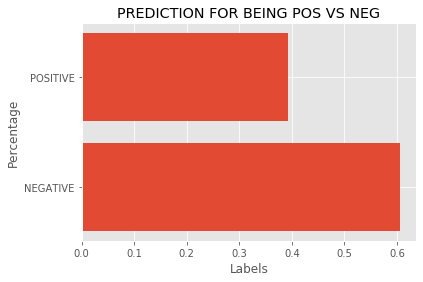


THE GIVEN TEXT IS NEGATIVE SENTIMENT
CPU times: user 479 ms, sys: 6.44 ms, total: 485 ms
Wall time: 3.23 s


In [ ]:
%%time
#String input
x = input("ENTER THE TEXT HERE : ")
x = tweet_cleaner(x)
x=[x,]
prediction(x)